In [1]:
# Load the needed libs

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (20,8)

## Image processing and data augmentation:

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
img_size = 150
batch_size = 2000

train_datagen = ImageDataGenerator(rescale=1/255.,rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Week-9- Image Classification-CNN-DL/seg_train/',target_size=(img_size, img_size),batch_size=batch_size,shuffle=True,class_mode='sparse')
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Week-9- Image Classification-CNN-DL/seg_train/',target_size=(img_size, img_size),batch_size=batch_size,shuffle=False,class_mode='sparse')

Found 6008 images belonging to 6 classes.
Found 6008 images belonging to 6 classes.


In [6]:
# read this to know abt keras generators,
#https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

In [ ]:
labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

samples = train_generator.__next__()
images = samples[0]
target = samples[1]

plt.figure(figsize = (20,20))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')


## Building CNN model:

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout, BatchNormalization


In [ ]:
#from tensorflow.keras.models import Sequential, Model
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout
# read this for keras layers
#https://keras.io/api/layers/convolution_layers/convolution2d/
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape= (img_size,img_size,3), activation = 'relu', padding = 'same')) #padding = same size output
model.add(MaxPooling2D())

#model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
#model.add(MaxPooling2D())

#model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
#model.add(MaxPooling2D())

#model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same'))
#model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation = 'softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 180000)            0         
                                                                 
 dense_6 (Dense)             (None, 32)                5760032   
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                      

## Training the model:

In [ ]:
history = model.fit(train_generator, validation_data=test_generator, epochs=1)

2/2 [==============================] - 74s 33s/step - loss: 0.8797 - accuracy: 0.6065 - val_loss: 8.2352 - val_accuracy: 0.5203


## Visualising the training loss and accuracies:

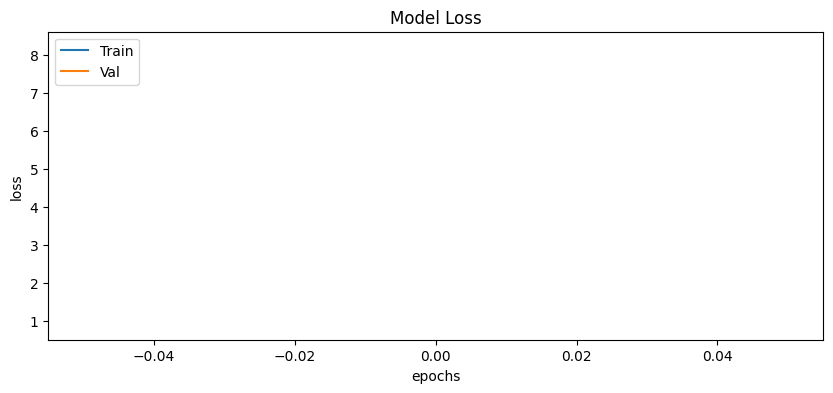

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

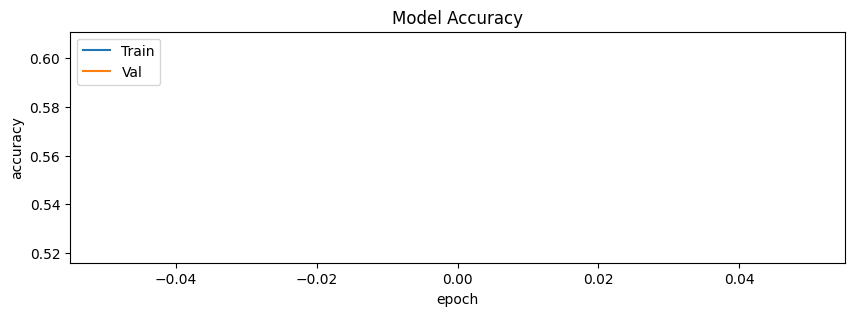

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## Making predictions on the test set:

In [ ]:
predictions = model.predict(test_generator)

# Get the predicted class for each image
predicted_classes = np.argmax(predictions, axis=1)

print('Predicted classes:', predicted_classes)
print('True labels:', test_generator.classes)

1/1 [==============================] - 8s 8s/step
Predicted classes: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

## Evaluating model performance:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print('Accuracy:\n', accuracy_score(test_generator.classes, predicted_classes))


##### Thus, the model can make correct classifications with 85% accuracy

## Classification report:

##### 1. Precision:

Precision is a metric that measures the proportion of true positive predictions among all positive predictions. It is calculated as TP / (TP + FP). In other words, precision measures how accurate the positive predictions are. A high precision means that most of the predicted positives are actually positive, while a low precision means that many of the predicted positives are actually negative.

##### 2. Recall:

Recall is a metric that measures the proportion of true positive predictions among all actual positive examples. It is calculated as TP / (TP + FN). In other words, recall measures how well the positive examples are identified by the model. A high recall means that most of the actual positives are correctly identified, while a low recall means that many of the actual positives are missed by the model.

##### 3. F1-score:

The F1-score is the harmonic mean of precision and recall, which combines both metrics into a single value. It is calculated as 2 * (precision * recall) / (precision + recall). The F1-score provides a balanced measure of both precision and recall, and it is useful when the two metrics are of equal importance.

In [ ]:
print('Classification Report:\n', classification_report(test_generator.classes, predicted_classes))


## Visualising Misclassifications:

### -> Confusion Matrix:

A confusion matrix is a table that visualizes the performance of a classification algorithm by displaying the number of correct and incorrect predictions. The diagonal of the matrix shows the number of correctly classified examples, and the off-diagonal entries represent the misclassified examples.

In [ ]:
print('Confusion Matrix:\n', confusion_matrix(test_generator.classes, predicted_classes))

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(test_generator.classes, predicted_classes),annot=True,fmt='.3g',xticklabels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
            yticklabels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],cmap='Blues')
plt.show()

In [ ]:
files = test_generator.filenames
data = pd.DataFrame()
data['file'] = files
data['actual_class'] = test_generator.classes
data['predicted_class'] = predicted_classes

In [ ]:
misclassification = data[data['actual_class']!=data['predicted_class']]

In [ ]:
len(misclassification)

In [ ]:
misclassification